In [192]:
import os
from collections import Counter
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as md
import matplotlib
import pylab as pl

In [193]:
%matplotlib inline
sns.set(style="darkgrid")
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [194]:
s=os.getcwd()
print(s)
pd.set_option('display.max_columns', 10)

C:\Users\sugan


In [195]:
# Loading the Data

In [196]:
items = pd.read_csv('items.csv')
shops = pd.read_csv('shops.csv')
cats = pd.read_csv('item_categories.csv')
sales_train = pd.read_csv('sales_train.csv')
sales_test = pd.read_csv('sales_test.csv')

In [197]:
items.head(n=2)

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76


In [198]:
shops.head(n=2)

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1


In [199]:
cats.head(n=2)

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1


In [200]:
sales_train.head(n=2)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.00
1,03.01.2013,0,25,2552,899.00,1.00


In [201]:
sales_test.head(n=2)

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320


In [202]:
Counter(sales_train.date_block_num).most_common()[:10]

[(11, 143246),
 (23, 130786),
 (2, 121347),
 (0, 115690),
 (1, 108613),
 (7, 104772),
 (6, 100548),
 (5, 100403),
 (12, 99349),
 (10, 96736)]

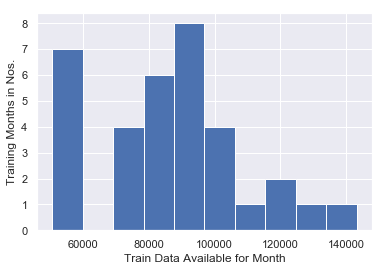

In [203]:
date_data_counts = [count for _, count in Counter(sales_train.date_block_num).most_common()]
plt.hist(date_data_counts)
plt.xlabel("Train Data Available for Month")
plt.ylabel("Training Months in Nos.")
plt.show()

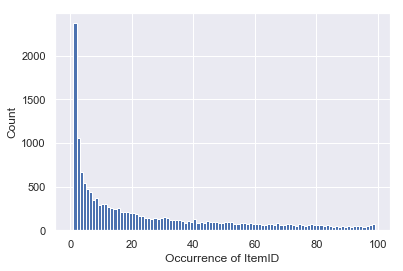

In [204]:
item_id_counts = [count for _, count in Counter(sales_train.item_id).most_common()]
plt.hist(item_id_counts, bins=range(0,100))
plt.xlabel("Occurrence of ItemID")
plt.ylabel("Count")
plt.show()

In [205]:
# how many item ids don't appear in the test data?
total_train_items = len(set(sales_train.item_id))
total_test_items_in_train = len(set(sales_train.item_id) & set(test.item_id))
total_test_items = len(set(test.item_id))
print("Total percentage of train item_ids that also appear in the test data:", total_test_items_in_train / total_train_items)
total_train_items, total_test_items, total_test_items_in_train

Total percentage of train item_ids that also appear in the test data: 0.21722382721144587


(21807, 5100, 4737)

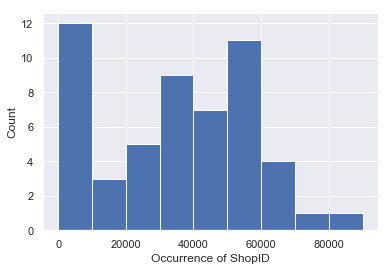

In [206]:
shop_id_counts = [count for _, count in Counter(sales_train.shop_id).most_common()]
plt.hist(shop_id_counts, bins=range(0, 100000, 10000))
plt.xlabel("Occurrence of ShopID")
plt.ylabel("Count")
plt.show()

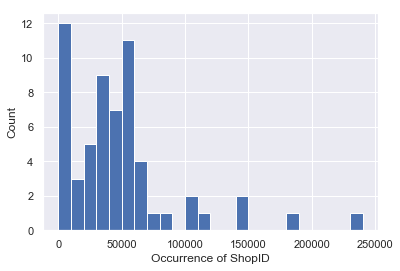

In [207]:
plt.hist(shop_id_counts, bins=range(0, 250000, 10000))
plt.xlabel("Occurrence of ShopID")
plt.ylabel("Count")
plt.show()

In [208]:
# how many shop ids don't appear in the test data?
total_train_shops = len(set(sales_train.shop_id))
total_test_shops_in_train = len(set(sales_train.shop_id) & set(test.shop_id))
total_test_shops = len(set(test.shop_id))
print("% of Shops in train data appearing in test data:", total_test_shops_in_train / total_train_shops)
total_train_shops, total_test_shops, total_test_shops_in_train

% of Shops in train data appearing in test data: 0.7


(60, 42, 42)

In [209]:
merged = sales_train.merge(items, on="item_id", how="left").drop(columns="item_name")
assert len(merged) == len(sales_train)
sales_train = merged

In [210]:
sales_train.head(n=10)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id
0,02.01.2013,0,59,22154,999.00,1.00,37
1,03.01.2013,0,25,2552,899.00,1.00,58
2,05.01.2013,0,25,2552,899.00,-1.00,58
3,06.01.2013,0,25,2554,1709.05,1.00,58
4,15.01.2013,0,25,2555,1099.00,1.00,56
5,10.01.2013,0,25,2564,349.00,1.00,59
6,02.01.2013,0,25,2565,549.00,1.00,56
7,04.01.2013,0,25,2572,239.00,1.00,55
8,11.01.2013,0,25,2572,299.00,1.00,55
9,03.01.2013,0,25,2573,299.00,3.00,55


In [211]:
len(set(sales_train.item_category_id))

84

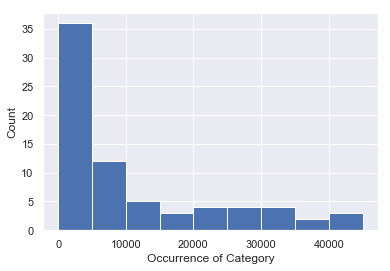

In [212]:
shopID_counts = [count for _, count in Counter(sales_train.item_category_id).most_common()]
plt.hist(shopID_counts, bins=range(0, 50000, 5000))
plt.xlabel("Occurrence of Category")
plt.ylabel("Count")
plt.show()


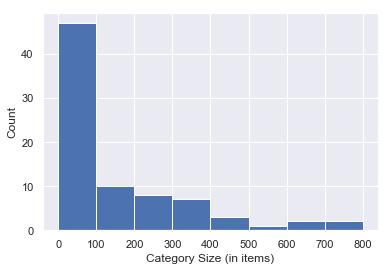

[4964, 2327, 1777, 1100, 769]
% items in top 5 categories: 0.5015362039712019


In [213]:
cat_item_counts = []
for category in set(sales_train.item_category_id):
    items_in_cat = len(set(sales_train[sales_train.item_category_id == category].item_id))
    cat_item_counts.append(items_in_cat)
assert sum(cat_item_counts) == total_train_items
plt.hist(cat_item_counts, bins=range(0, 900, 100))
plt.xlabel("Category Size (in items)")
plt.ylabel("Count")
plt.show()
# The majority of categories contain fewer than 100 items
cat_item_counts = sorted(cat_item_counts, reverse=True)
print(cat_item_counts[:5])
print("% items in top 5 categories:", sum(cat_item_counts[:5]) / total_train_items)

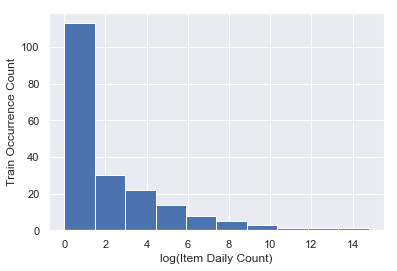

In [214]:
item_cnd_day_counts = [np.log(count) for _, count in Counter(sales_train.item_cnt_day).most_common()]
plt.hist(item_cnd_day_counts)
plt.xlabel("log(Item Daily Count)")
plt.ylabel("Train Occurrence Count")
plt.show()

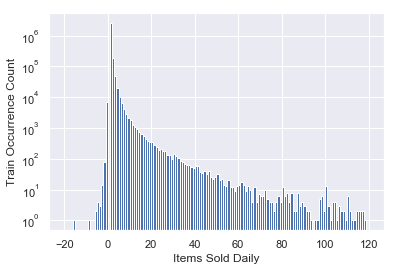

In [215]:
plt.hist([day for day in sales_train.item_cnt_day if day < 150], bins=range(-20,121), log=True)
plt.xlabel("Items Sold Daily")
plt.ylabel("Train Occurrence Count")
plt.show()
# Distribution of item_cnt_day

In [216]:
Counter(sales_train.item_cnt_day).most_common()[:5], min(sales_train.item_cnt_day), max(sales_train.item_cnt_day)

([(1.0, 2629372), (2.0, 194201), (3.0, 47350), (4.0, 19685), (5.0, 10474)],
 -22.0,
 2169.0)

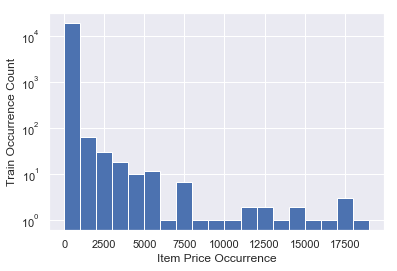

In [217]:
item_price_counts = [count for _, count in Counter(sales_train.item_price).most_common()]
plt.hist(item_price_counts, log=True, bins=range(0,20000,1000))
plt.xlabel("Item Price Occurrence")
plt.ylabel("Train Occurrence Count")
plt.show()

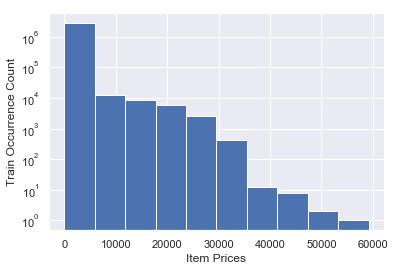

In [218]:
plt.hist([price for price in sales_train.item_price if price < 100000], log=True)
plt.xlabel("Item Prices")
plt.ylabel("Train Occurrence Count")
plt.show()
# Distribution of item_price

In [219]:
sales_train.date.iloc[0]

'02.01.2013'

In [220]:
dates = pd.to_datetime(sales_train.date, format="%d.%m.%Y")
dates[:10]

0   2013-01-02
1   2013-01-03
2   2013-01-05
3   2013-01-06
4   2013-01-15
5   2013-01-10
6   2013-01-02
7   2013-01-04
8   2013-01-11
9   2013-01-03
Name: date, dtype: datetime64[ns]

In [221]:
dates = pd.to_datetime(sales_train.date, format="%d.%m.%Y")
sales_train["year"] = [d.year for d in dates]
sales_train["month"] = [d.month for d in dates]

In [222]:
sales_train.head(10)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id,year,month
0,02.01.2013,0,59,22154,999.00,1.00,37,2013,1
1,03.01.2013,0,25,2552,899.00,1.00,58,2013,1
2,05.01.2013,0,25,2552,899.00,-1.00,58,2013,1
3,06.01.2013,0,25,2554,1709.05,1.00,58,2013,1
4,15.01.2013,0,25,2555,1099.00,1.00,56,2013,1
5,10.01.2013,0,25,2564,349.00,1.00,59,2013,1
6,02.01.2013,0,25,2565,549.00,1.00,56,2013,1
7,04.01.2013,0,25,2572,239.00,1.00,55,2013,1
8,11.01.2013,0,25,2572,299.00,1.00,55,2013,1
9,03.01.2013,0,25,2573,299.00,3.00,55,2013,1


In [223]:
print("sales_train\n", sales_train.dtypes)
print("sales_test\n", test.dtypes)

sales_train
 date                 object
date_block_num        int64
shop_id               int64
item_id               int64
item_price          float64
item_cnt_day        float64
item_category_id      int64
year                  int64
month                 int64
dtype: object
sales_test
 ID         int64
shop_id    int64
item_id    int64
dtype: object


In [224]:
sales_test.head(2)

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320


In [225]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime, date
from dateutil.relativedelta import relativedelta

from sklearn.preprocessing import StandardScaler

from math import ceil

from keras.callbacks import LambdaCallback
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import LSTM
from keras.optimizers import RMSprop

%matplotlib inline

In [226]:
#sales_test = sales_test.shop_id.unique()
# sales_train = sales_train[sales_train.shop_id.isin(sales_test)]
# sales_test_items = sales_test.item_id.unique()
# sales_train = sales_train[sales_train.item_id.isin(sales_test_items)]

In [227]:
sales_test.head(2)

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320


In [228]:
print("There were", sales_train.shape[0], "observations in the training dataset and", sales_test.shape[0], "in the test dataset.")
print("In total there were", sales_train.shape[0] + sales_test.shape[0], "observations.")

There were 2935849 observations in the training dataset and 214200 in the test dataset.
In total there were 3150049 observations.


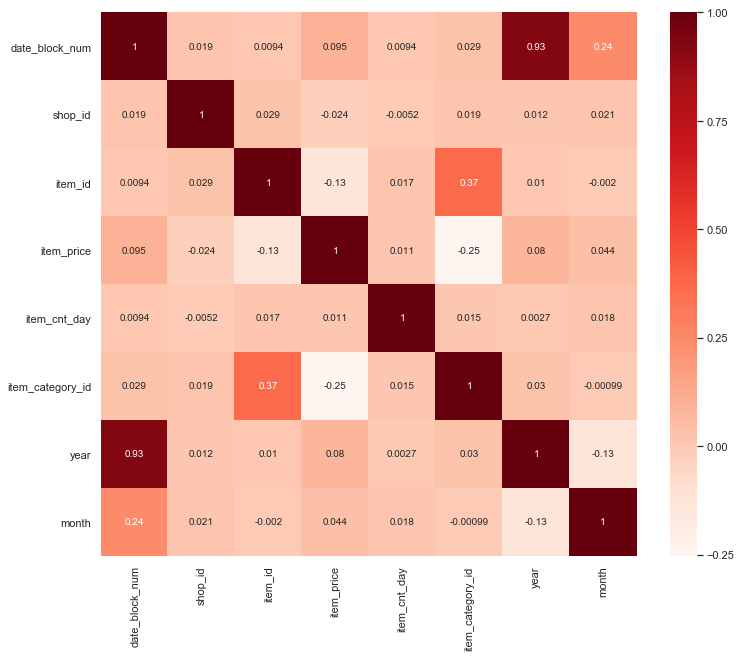

In [230]:
plt.figure(figsize=(12,10))
cor = sales_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [232]:
sales_train['date'] = pd.to_datetime(sales_train['date'], format='%d.%m.%Y')
sales_train['Year'] = sales_train['date'].dt.year
sales_train['Month'] = sales_train['date'].dt.month
sales_train['Day'] = sales_train['date'].dt.day
sales_train.head(10)
sales_train.dtypes

date                datetime64[ns]
date_block_num               int64
shop_id                      int64
item_id                      int64
item_price                 float64
item_cnt_day               float64
item_category_id             int64
year                         int64
month                        int64
Year                         int64
Month                        int64
Day                          int64
dtype: object

In [233]:
# Gain insights into data based on column shopID and itemCategoryID

In [235]:
sales_train.groupby(['shop_id'])['item_cnt_day'].aggregate('count').reset_index().sort_values('item_cnt_day', ascending=False)

,shop_id,item_cnt_day
31,31,235636
25,25,186104
54,54,143480
28,28,142234
57,57,117428
42,42,109253
27,27,105366
6,6,82663
58,58,71441
56,56,69573


In [236]:
def unique_counts(sales_train):
   for i in sales_train.columns:
       count = sales_train[i].nunique()
       print(i, ": ", count)
unique_counts(sales_train)

date :  1034
date_block_num :  34
shop_id :  60
item_id :  21807
item_price :  19993
item_cnt_day :  198
item_category_id :  84
year :  3
month :  12
Year :  3
Month :  12
Day :  31


In [237]:
sales_train.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,...,year,month,Year,Month,Day
count,2935849.00,2935849.00,2935849.00,2935849.00,2935849.00,...,2935849.00,2935849.00,2935849.00,2935849.00,2935849.00
mean,14.57,33.00,10197.23,890.85,1.24,...,2013.78,6.25,2013.78,6.25,15.85
std,9.42,16.23,6324.30,1729.80,2.62,...,0.77,3.54,0.77,3.54,8.92
min,0.00,0.00,0.00,-1.00,-22.00,...,2013.00,1.00,2013.00,1.00,1.00
25%,7.00,22.00,4476.00,249.00,1.00,...,2013.00,3.00,2013.00,3.00,8.00
50%,14.00,31.00,9343.00,399.00,1.00,...,2014.00,6.00,2014.00,6.00,16.00
75%,23.00,47.00,15684.00,999.00,1.00,...,2014.00,9.00,2014.00,9.00,24.00
max,33.00,59.00,22169.00,307980.00,2169.00,...,2015.00,12.00,2015.00,12.00,31.00


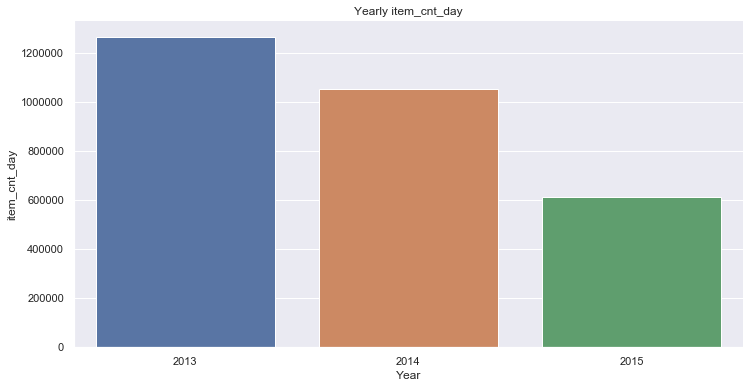

In [238]:
plt.figure(figsize=(12,6))
sns.countplot(x='Year', data = sales_train)
plt.xlabel('Year')
plt.ylabel('item_cnt_day')
plt.title('Yearly item_cnt_day')
sns.despine()

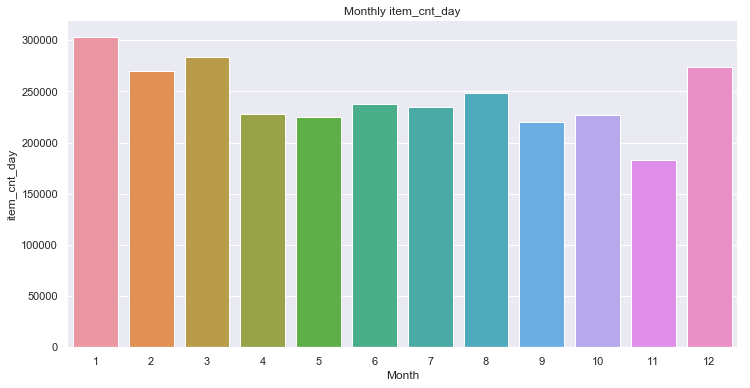

In [239]:
plt.figure(figsize=(12,6))
sns.countplot(x='Month', data = sales_train)
plt.xlabel('Month')
plt.ylabel('item_cnt_day')
plt.title('Monthly item_cnt_day')
sns.despine()

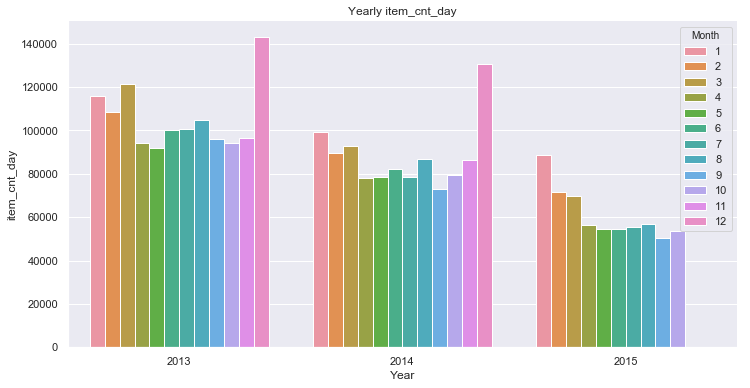

In [240]:
plt.figure(figsize=(12,6))
sns.countplot(x='Year', data = sales_train, hue='Month')
plt.xlabel('Year')
plt.ylabel('item_cnt_day')
plt.title('Yearly item_cnt_day')
sns.despine()

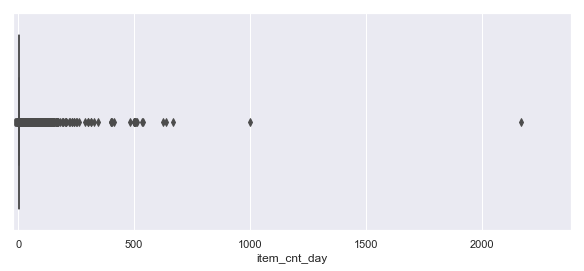

In [241]:
plt.figure(figsize=(10,4))
plt.xlim(sales_train.item_cnt_day.min(), sales_train.item_cnt_day.max()*1.1)
sns.boxplot(x=sales_train.item_cnt_day)

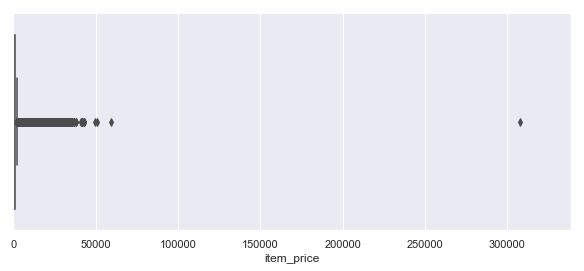

In [242]:
plt.figure(figsize=(10,4))
plt.xlim(sales_train.item_price.min(), sales_train.item_price.max()*1.1)
sns.boxplot(x=sales_train.item_price)

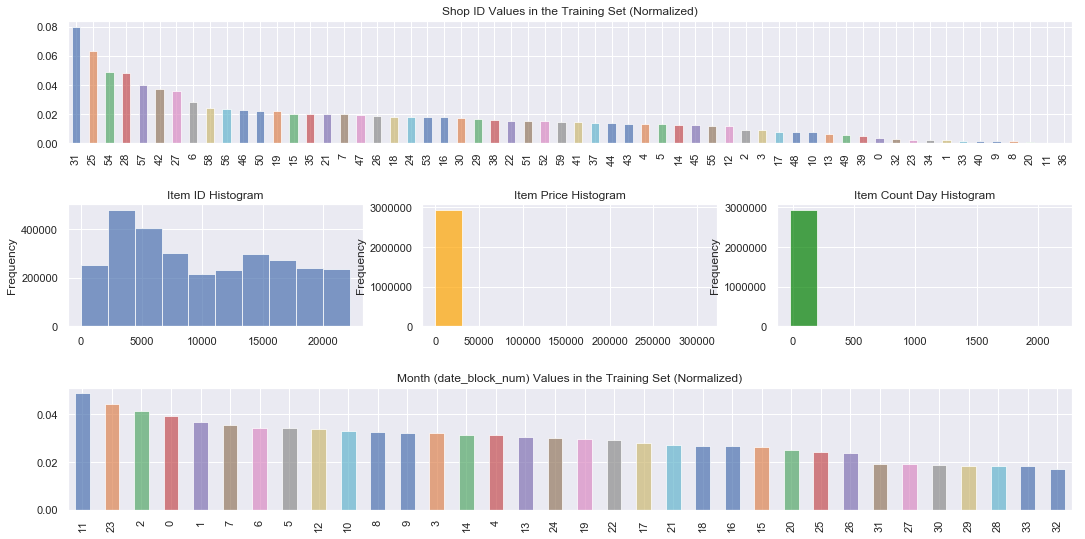

In [243]:
fig = plt.figure(figsize=(18,9))
plt.subplots_adjust(hspace=.5)

plt.subplot2grid((3,3), (0,0), colspan = 3)
sales_train['shop_id'].value_counts(normalize=True).plot(kind='bar', alpha=0.7)
plt.title('Shop ID Values in the Training Set (Normalized)')

plt.subplot2grid((3,3), (1,0))
sales_train['item_id'].plot(kind='hist', alpha=0.7)
plt.title('Item ID Histogram')

plt.subplot2grid((3,3), (1,1))
sales_train['item_price'].plot(kind='hist', alpha=0.7, color='orange')
plt.title('Item Price Histogram')

plt.subplot2grid((3,3), (1,2))
sales_train['item_cnt_day'].plot(kind='hist', alpha=0.7, color='green')
plt.title('Item Count Day Histogram')

plt.subplot2grid((3,3), (2,0), colspan = 3)
sales_train['date_block_num'].value_counts(normalize=True).plot(kind='bar', alpha=0.7)
plt.title('Month (date_block_num) Values in the Training Set (Normalized)')

plt.show()


In [244]:
# The above graphs are a nice way to look at the raw distribtion of the test dataset. Here are some observations:

# We have 60 'shop_id's but there is an uneven distribtution of these in the dataset. Four (<7%) of these shops make up ~25 percent of this dataset. These are shops (31, 25, 54, 28).
# The Item IDs seem to have variations in frequency. We can't attribute a reason to this yet but we can inspect this further. Certain cateogeries are bound to sell better and maybe items under the same category are closer to each other as far as their ID distributions are concerned
# From the vast empty spaces in the histograms of 'item_price' and 'item_cnt_day', we can infer that there are outliers in their distribution. Let's write some simple code below to put a value to these outliers.
# Plotting the individual months from January 2013 to October 2015, it is interesting to see that the block month 12, corresponding to December 2013, had the highest number of sales. Month 23, which corresponds to December 2014, had the second highest number of sales. 


In [246]:
# Dealing with outliers
sales_train['item_id'].value_counts(ascending=False)[:5]

# Having a look at the item id 20949 that has been sold the most number of times, it is a plastic bag!

20949    31340
5822      9408
17717     9067
2808      7479
4181      6853
Name: item_id, dtype: int64

In [247]:
items.loc[items['item_id']==20949]

,item_name,item_id,item_category_id
20949,Фирменный пакет майка 1С Интерес белый (34*42)...,20949,71


In [250]:
cats.loc[cats['item_category_id']==71]

,item_category_name,item_category_id
71,"Подарки - Сумки, Альбомы, Коврики д/мыши",71


In [253]:
# cross checking with test dataset, there is only one item under item category 71 and it is indeed present in the test set!
sales_test.loc[test['item_id']==20949].head(5)

,ID,shop_id,item_id
460,460,5,20949
5560,5560,4,20949
10660,10660,6,20949
15760,15760,3,20949
20860,20860,2,20949


In [255]:
sales_train['item_cnt_day'].sort_values(ascending=False)[:5]

2909818   2169.00
2326930   1000.00
2864235    669.00
2851091    637.00
2608040    624.00
Name: item_cnt_day, dtype: float64

In [257]:
# item 11373 was sold 2169 times at shop 12 on a single day in October. Let's inspect this outlier a bit more.
sales_train[sales_train['item_cnt_day'] == 2169]

,date,date_block_num,shop_id,item_id,item_price,...,year,month,Year,Month,Day
2909818,2015-10-28,33,12,11373,0.91,...,2015,10,2015,10,28


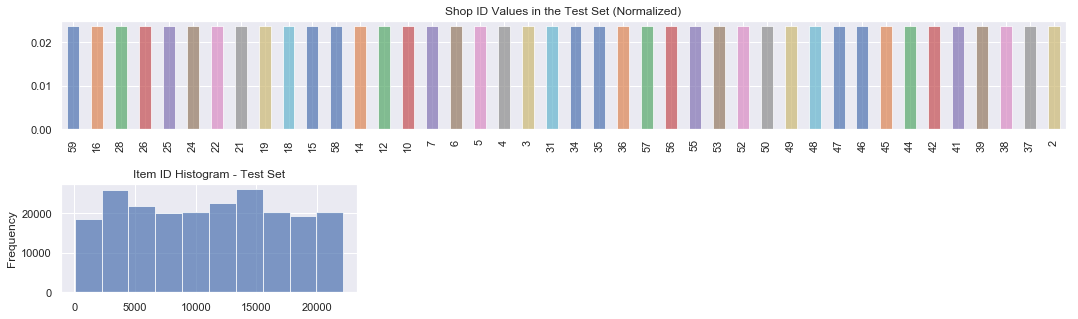

In [258]:
# Test set distribution
fig = plt.figure(figsize=(18,8))
plt.subplots_adjust(hspace=.5)

plt.subplot2grid((3,3), (0,0), colspan = 3)
sales_test['shop_id'].value_counts(normalize=True).plot(kind='bar', alpha=0.7)
plt.title('Shop ID Values in the Test Set (Normalized)')

plt.subplot2grid((3,3), (1,0))
sales_test['item_id'].plot(kind='hist', alpha=0.7)
plt.title('Item ID Histogram - Test Set')

plt.show()

In [259]:
# The Shop Id's are evenly spread out, unlike the training set. The font size of labels quickly tells me that there are certain Shop Id's missing in the test set as the bars in the training set 'shop_id' plot were more tightly packed.
# While item id's in the histogram are binned, the spikes are less in the test set. The test set is much smaller in shape than the training set, and naturally, the frequency values are significantly lower. It is tough to be draw more insights from this histogram.
# It seems there might be some values of shop_id and item_id completely missing in the test set. Let's have a closer look and put some numbers or percentages to these missing values.

In [260]:
# Let us do some analysis based on Shops
shops_train = sales_train['shop_id'].nunique()
shops_test = sales_test['shop_id'].nunique()
print('Shops in Training Set: ', shops_train)
print('Shops in Test Set: ', shops_test)

Shops in Training Set:  60
Shops in Test Set:  42


In [261]:
# However, this doesn't mean that the training set contains all of the shops present in the test set. 
# For that, we need to see if every element of the test set is present in the training set. 
# Let's write some simple code to see if the test set list is a subset of the training set list.

In [262]:
# Check if all shop id in train data set are present in test dataset
shops_train_list = list(sales_train['shop_id'].unique())
shops_test_list = list(sales_test['shop_id'].unique())

flag = 0
if(set(shops_test_list).issubset(set(shops_train_list))): 
    flag = 1
      
if (flag) : 
    print ("Yes, list is subset of other.") 
else : 
    print ("No, list is not subset of other.") 

Yes, list is subset of other.
